plotting with python - homework 4

$U(Q_1,Q_2) = \frac{1}{2} K_1 Q_1^2 + \frac{1}{2} K_2 Q_2^2 + C Q_1 Q_2^2$

### in class notes

split (0.5 k1 Q2^2) = U1 and (0.5 k2 Q2^2) = U2  
U = U1 + U2 + (C Q1 Q2^2)  
plot U(Q2 = 0), U1 and U(Q1 = 0), U2 as *plots*  
plot Q1, Q2 as *contour*  



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider 


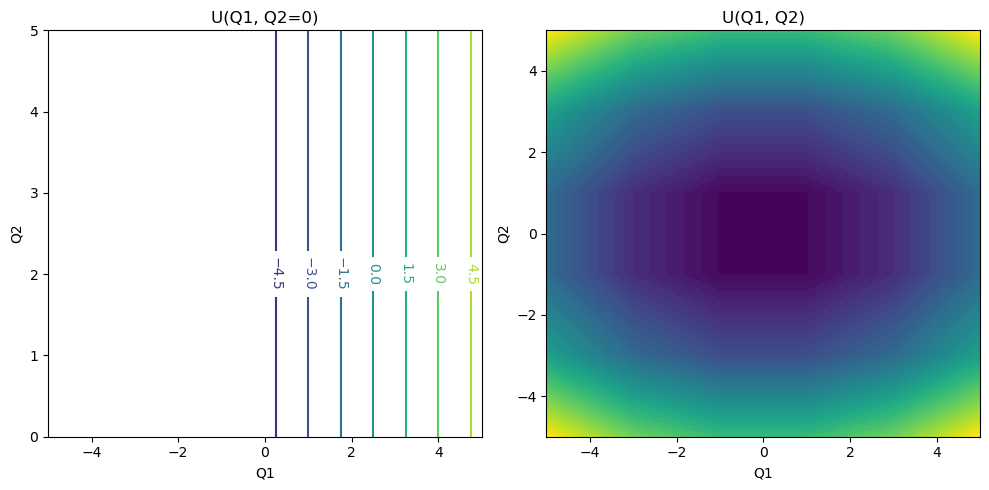

interactive(children=(FloatSlider(value=1.0, description='k1', max=50.0, min=-50.0), FloatSlider(value=1.0, de…

<function __main__.bigplot(k1=1, k2=2, c=0, levels=10)>

In [18]:
#retrying this to make sure i understand. if i dont get the grade thats fine i just need to know whats going on

def bigplot(k1=1, k2=2, c=0, levels=10):

    #first we define the veriables
    q1 = np.linspace(-5,5,6)
    q2 = np.linspace(-5,5,6)
    Q1, Q2 = np.meshgrid(q1, q2)
    #print(Q1, Q2)
    #k1 = 1.0
    #k2 = 1.0
    #c = 0.0
    
    #define the functions, split apart into sections
    def U1 (Q1):
        return 0.5 * k1 * Q1**2
    def U2 (Q2):
        return 0.5 * k2 * Q2**2
        
    def U (Q1, Q2):
        return U1(Q1) + U2(Q2) + c * Q1 * Q2**2
    
    U1_y = U1(Q1)
    U2_y = U2(Q2)
    U_y = U(Q1, Q2)
    #print(U(Q1, Q2))
    
    #can i test the plot now?
    
    #print(np.transpose([Q1, U_y])) #do it work
    #print(U(1, 1, 0))
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(1, 2, 1)
    q_levels = [-2, -1, 0, 1, 2, 4]
    plot1 = plt.contourf(Q1, Q2==0, U_y, levels=q_levels, cmap="viridis")
    plot2 = plt.contour(Q1, Q2==q_levels, levels=6)
    plt.clabel(plot2)
    plt.xlabel("Q1")
    plt.ylabel("Q2")
    plt.title("U(Q1, Q2=0)")

    plt.subplot(1, 2, 2)
    plot3 = plt.contourf(Q1, Q2, U_y, levels=50, cmap="viridis")
    plt.xlabel("Q1")
    plt.ylabel("Q2")
    plt.title("U(Q1, Q2)")
    
  
    plt.tight_layout()
    plt.show()

bigplot()


interact(bigplot,
        k1=FloatSlider(min=-50, max=50, step=0.1, value=1.0, description='k1'),
        k2=FloatSlider(min=-50, max=50, step=0.1, value=1.0, description='k2'),
        c=FloatSlider(min=-50, max=50, step=0.1, value=0.0, description='c'),
        levels=FloatSlider(min=0, max=50, step=0.1, value=0.0, description='levels')
)

### old assignment 

#define where the plot is
q1 = np.linspace(-10, 10, 15)
q2 = np.linspace(-10, 10, 15)
Q1, Q2 = np.meshgrid(q1, q2)

k1, k2, c = 1, 1, 0.5

# oscillator function
Z = (0.5 * k1 * Q1 ** 2) + (0.5 * k2 * Q2 ** 2) + (c * Q1 * Q2 ** 2)


plt.figure(figsize=(4,4))
osc_contour = plt.contourf(Q1, Q2, Z, levels=15, cmap="Spectral")
plt.colorbar(osc_contour)
plt.xlabel("Q1")
plt.ylabel("Q2")
plt.clabel(osc_contour, inline=True, fontsize=10)

plt.show()



def contours_osc(Q1, Q2, Z, contour_levels, title="$U(Q_1, Q_2)$", xlabel="$Q_1$", 
                 ylabel="$Q_2$", colormap="Spectral", line_color="black", line_width=1, add_labels=True, 
                 grid=True, xlim=[-10, 10], ylim=[-10, 10], add_colorbar=True, figsize=(5, 6)):
    
    plt.figure(figsize=figsize)
    
    plt.subplot(1, 2, 1)
   
    contour_1 = plt.contourf(Q1, Q2, Z, levels=contour_levels, cmap=colormap)
    
    plt.title(title, fontsize=8)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(contour_1)
    plt.grid(True)
    plt.clabel(contour_1, inline=True)
    
    plt.subplot(1, 2, 2)
    contour_2 = plt.contourf(Q1, Q2, Z, levels=contour_levels, cmap=colormap)
    
    plt.title(title, fontsize=8)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(contour_2)
    plt.grid(True)
    plt.clabel(contour_2, inline=True)
    
    interact(contour_2,
            k1=FloatSlider(min=-5, max=5, step=0.1, value=1, description="k1"),
            k2=FloatSlider(min=-5, max=5, step=0.1, value=1, description="k2"),
            c=FloatSlider(min=-5, max=5, step=0.1, value=1, description="c"),
            contour_levels=IntSlider(min=5, max=20, step=1, value=5, description="levels")
            )
    
    plt.show()
        


contour_levels = [-3, -2, -1, 0, 1, 2, 3, 4, 5]
contours_osc(Q1, Q2, Z, contour_levels, figsize=(10, 5))